In [1]:
import threading
import time
from binance.client import Client
import numpy as np

api_key = "S5oZ5vgg9bVdShqXtsHrKUVWk1x9tPDYproDn1zfnqxH8RXkz5r9PVAEiEEbjnFP"
api_secret = "ATvDgvpl5hLHpzTRQwEKSZexoJEGu7U1kd3tb7m1arXaw0HBXxzYfZ9jHCiNp8qO"
client = Client(api_key, api_secret)

prices = client.futures_historical_klines(
    symbol='ETHBUSD',
    interval='15m',
    start_str='2022-09-04',
    end_str='2022-10-04'
)

In [5]:
data = []
for i in prices:
    data.append(float(i[1]))


0.0001
Beginning Randomly Generated Weights: 
[[-0.16595599]]
獲利 : 687.0099999999888
獲利 : 1381.4700000000091
獲利 : 3366.6799999999985
獲利 : 5137.879999999988
獲利 : 5168.890000000001
獲利 : 6503.359999999983
獲利 : 6589.299999999996
獲利 : 6644.510000000009
獲利 : 6868.690000000012
獲利 : 8316.470000000016
獲利 : 8414.23999999999
獲利 : 8541.34000000003
獲利 : 8918.959999999997
buy 1556.44 get 0.0
sell 1555.6 get -0.8400000000001455
buy 1555.43 get 0.16999999999984539
sell 1552.65 get 238.26
buy 1548.1 get 4.550000000000182
sell 1552.05 get 230.01999999999998
buy 1564.87 get -12.819999999999936
sell 1557.27 get 262.18000000000006
buy 1565.3 get -8.029999999999973
sell 1569.06 get 276.1199999999999
buy 1564.39 get 4.669999999999845
sell 1567.5 get 283.71000000000004
buy 1568.47 get -0.9700000000000273
sell 1574.68 get 293.48
buy 1571.17 get 3.509999999999991
sell 1561.7 get 266.1300000000001
buy 1561.3 get 0.40000000000009095
sell 1562.45 get 263.30999999999995
buy 1572.2 get -9.75
sell 1578.85 get 281.049

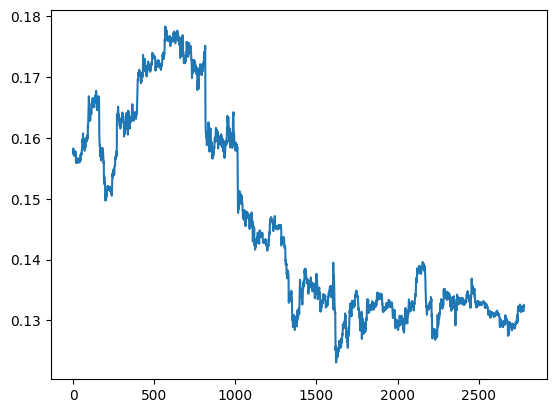

100


ValueError: x and y must have same first dimension, but have shapes (2781,) and (100, 0)

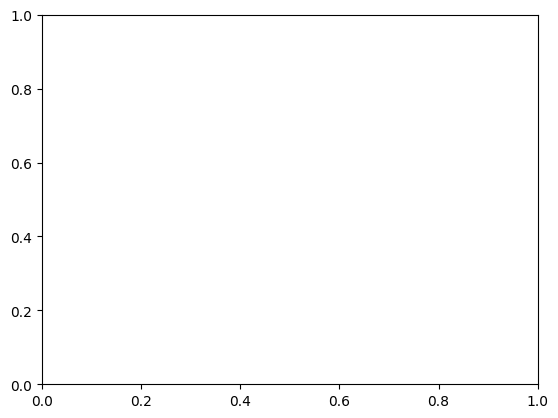

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

num = 0.00001
for i in range(15):
    if 1 > data[-1]*num > 0.1:
        break
    else:
        num *= 10

print(num)
        
K_line = []
for i in data:
    K_line.append([i*num])

class NeuralNetwork():

    def __init__(self):
    # 設定隨機數種子
        np.random.seed(1)
        self.synaptic_weights = 2 * np.random.random((1, 1)) - 1

    def sigmoid(self, x):
    # 應用sigmoid啟用函式
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
    #計算Sigmoid函式的偏導數
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):

        # 訓練模型
        for iteration in range(training_iterations):
        # 得到輸出
            output = self.think(training_inputs)

            # 計算誤差
            error = training_outputs - output

            # 微調權重
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
    # 輸入通過網路得到輸出
    # 轉化為浮點型資料型別

        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    # 初始化神經類
    neural_network = NeuralNetwork()
    data_len = 100
    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)

    best_get = 0
    best_modes = []
    best_log = ""
    for j in range(100000):
        get = 0
        mode = -1
        st_mode = 0
        modes = []
        log = ""
        order_price = data[0]
        for i in range(len(data)):
            if random.randrange(10) == 0:
                mode = -mode
                
            if mode > 0:
                modes.append(1)
            else:
                modes.append(0)
                
            if mode == -1 and mode != st_mode:
                log += "buy "+str(data[i])+" get "+str(order_price-data[i])+"\n"
                st_mode = mode
                get += order_price-data[i]
                order_price = data[-i]
                
            elif mode == 1 and mode != st_mode:
                log += "sell "+str(data[i])+" get "+str(data[i]-order_price)+"\n"
                st_mode = mode
                get += data[i]-order_price
                order_price = data[i]
                
        if get > best_get:
            best_get = get
            best_log = log
            print("獲利 :", get)
            best_modes = modes
            
    print(best_log)
    
    
    k = []
    for i in range(len(K_line)-data_len):
        k.append(i)
    
    user_input_price = ""
    AI_line = []
    for i in range(len(K_line)-K_line[i:i+data_len]):

        #訓練資料
        training_inputs = np.array(K_line[i:i+data_len])
        training_outputs = np.array([best_modes]).T

        # 開始訓練
        neural_network.train(training_inputs, training_outputs, 1000)
        
        if neural_network.think(np.array([0.99]))[0] > neural_network.think(np.array([0.1]))[0]:
        

    plt.plot(k, AI_line) 
    plt.show()
    